# Ejemplo: Regresión Lineal

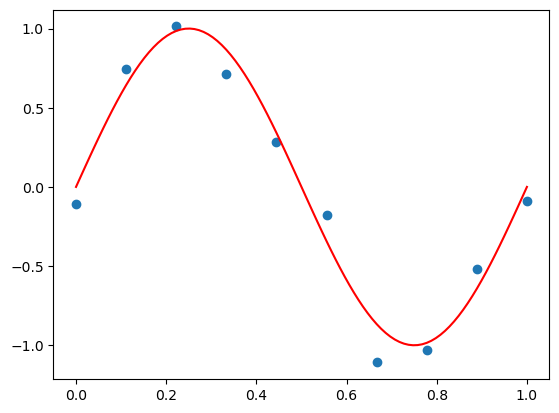

In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

# Create data for the example. Note that data is a 2d array!
np.random.seed(123)
x = np.linspace(0, 1, 10).reshape(-1, 1)
y = np.sin(2 * np.pi * x) + 0.1 *  np.random.randn(10, 1)


def plot_data(x, y):
    plt.scatter(x, y)
    xs = np.linspace(0, 1, 100)
    ys = np.sin(2 * np.pi * xs)
    plt.plot(xs, ys, 'r' , label='True function')

plot_data(x, y)

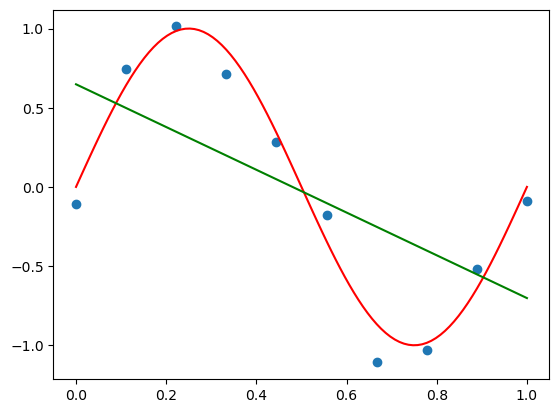

MSE is 0.29089516477320043 


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(x, y)

preds = model.predict(x)
plot_data(x, y)
plt.plot(x, preds, 'g', label='Linear regression')
plt.show()

print(f"MSE is {mean_squared_error(y_pred=preds, y_true=y)} ")

# Ejemplo: Ingeniería de Características (Feature engineering)

In [22]:
from sklearn.preprocessing import PolynomialFeatures

# Let's visualize what the polynomial features look like with a simple example
simple_x = np.array([1, 2, 3]).reshape(3, 1)
print(simple_x)

poly = PolynomialFeatures(degree=3)
# or equivalently new_x = poly.fit_transform(simple_x)
poly.fit(simple_x)
new_x = poly.transform(simple_x)
print("*" * 80)
print(new_x)

[[1]
 [2]
 [3]]
********************************************************************************
[[ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  3.  9. 27.]]


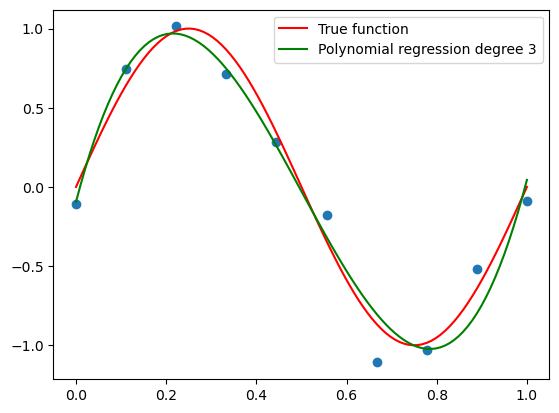

In [23]:
# Repeating the above code for clarity on our data
poly = PolynomialFeatures(degree=3)
poly.fit(x)
new_x = poly.transform(x)

model = LinearRegression()
model.fit(new_x, y)

xs = np.linspace(0, 1, 100).reshape(-1, 1)
preds = model.predict(poly.transform(xs))

plot_data(x, y)
plt.plot(xs, preds, 'g', label="Polynomial regression degree 3")
plt.legend()
plt.show()

# Comparando modelos (mal)
Repite el procedimiento anterior para grados 1, 3, 5 y 9. Mide los MSEs... ¿Cuál es el mejor modelo?

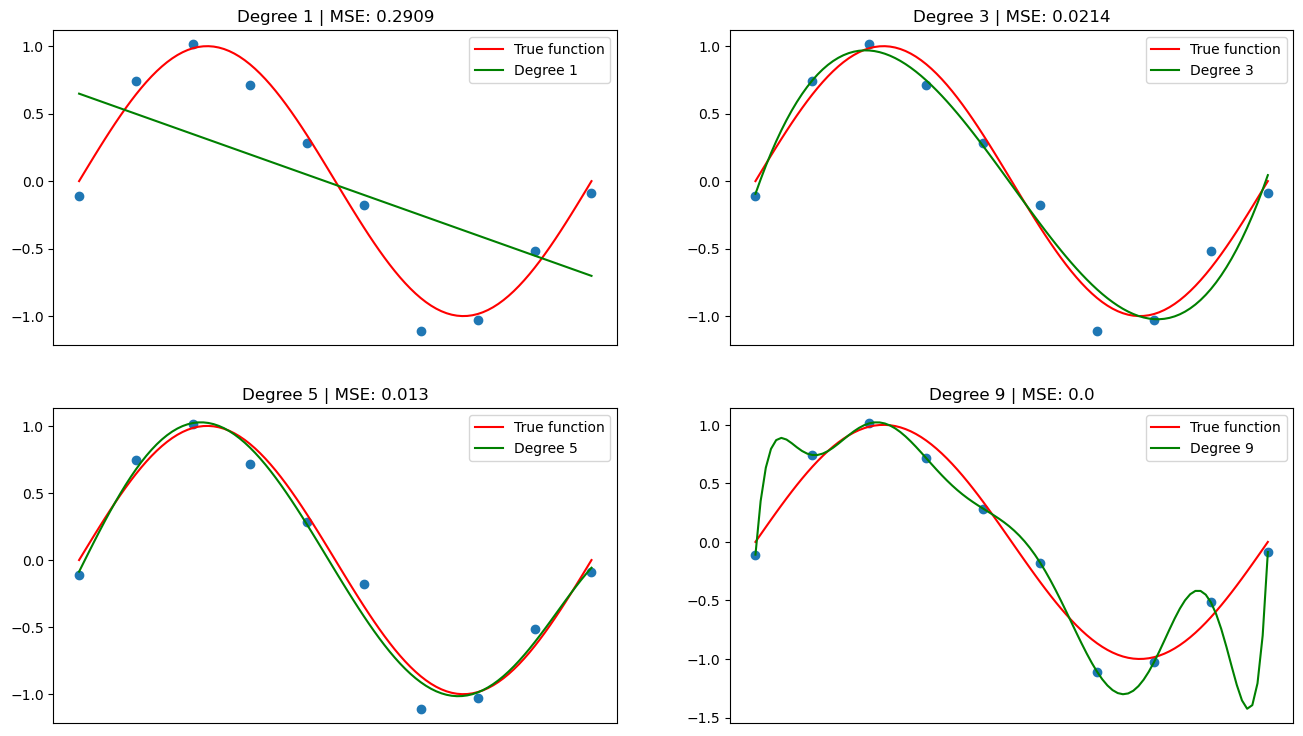

[0.29089516477320043, 0.02144343742648055, 0.012982891604838218, 9.705911082615147e-22]


In [24]:
mses = []
plt.figure(figsize=(16, 9))
xs = np.linspace(0, 1, 100).reshape(-1, 1)
for i, degree in enumerate([1, 3, 5, 9]):
    poly = PolynomialFeatures(degree=degree)
    poly.fit(x)
    new_x = poly.transform(x)

    model = LinearRegression()
    model.fit(new_x, y)

    preds = model.predict(new_x)
    mses.append(mean_squared_error(y_pred=preds, y_true=y))

    plot_preds = model.predict(poly.transform(xs))
    plt.subplot(2, 2, i + 1)
    plot_data(x, y)
    plt.plot(xs, plot_preds, "g", label=f"Degree {degree}")
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False # labels along the bottom edge are off
    )
    plt.legend()
    plt.title(f"Degree {degree} | MSE: {np.round(mses[-1], 4)}")
plt.show()
print(mses)

# Ejemplo: división train-test 
**Divisiones habituales para entrenamiento y test son -> train: 70-90%, test: 10-30%.**

In [ ]:
from sklearn.model_selection import train_test_split
# Let's use more data....
np.random.seed(123)
x = np.linspace(0, 1, 100).reshape(-1, 1)
y = np.sin(2 * np.pi * x) + 0.3 *  np.random.randn(100, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

# ... Train on x_train, y_train. Predict on x_test and evaluate on y_test

# Ejemplo: Procedimiento completo con divisiones train-validation-test


{1: 0.2994841660815774, 2: 0.30639844259212984, 3: 0.04317692649057447, 4: 0.043542429989341616, 5: 0.043931702232593274, 10: 0.046264683472955925, 20: 0.05514892178108394, 50: 0.38647308954866655}
Best model has degree 3, and a test-MSE of 0.02489606456918805


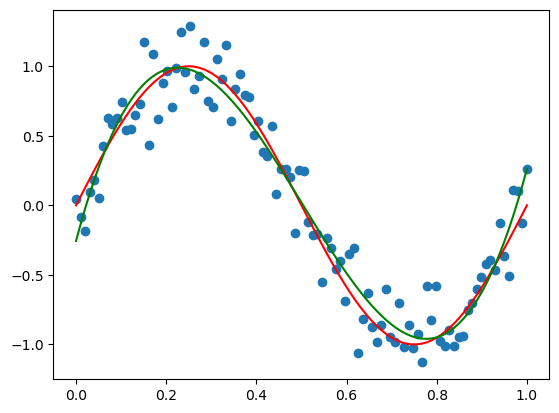

In [ ]:
# Let's use more data....
np.random.seed(34)
x = np.linspace(0, 1, 100).reshape(-1, 1)
y = np.sin(2 * np.pi * x) + 0.2 *  np.random.randn(100, 1)


# Let's do a 70, 30, 30 split
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=34)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=253)


def train_and_test(train, test, degree):
    x_train, y_train = train
    x_test, y_test = test
    poly = PolynomialFeatures(degree=degree)
    new_x_train =poly.fit_transform(x_train)
    model = LinearRegression()
    model.fit(new_x_train, y_train)
    new_x_test = poly.transform(x_test)
    preds_test = model.predict(new_x_test)
    return (poly, model), mean_squared_error(y_pred=preds_test, y_true=y_test)

mses = {}
models = []
for degree in [1, 2, 3, 4, 5, 10, 20, 50]:
    models_pair, mse = train_and_test((x_train, y_train), (x_val, y_val), degree)
    models.append(models_pair)
    mses[degree] = mse


print(mses)
best_degree = min(mses, key=mses.get)

# Use all data as possible for the final training!
final_x_train = np.concatenate([x_train, x_val], axis=0)
final_y_train = np.concatenate([y_train, y_val], axis=0)

final_models, final_mse = train_and_test((final_x_train, final_y_train), (x_test, y_test), best_degree)
poly_model, reg_model = final_models

print(f"Best model has degree {best_degree}, and a test-MSE of {final_mse}")

xs = np.linspace(0, 1, 100).reshape(-1,1)
plot_data(x, y)
plt.plot(xs, reg_model.predict(poly_model.transform(xs)), "g", label="Best model")
plt.show()

# Ejercicio: Pipeline y GridSearch
Un mejor procedimiento para manejar los pasos `PolynomialFeatures` y `LinearRegression` es usar una [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). Repite el ejercicio anterior usando una pipeline.

# Ejercicio: coeficientes del modelo de regresión lineal 
Lee [la documentación sobre regresión lineal](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) y halla los coeficientes (los valores de **w**) de los diferentes modelos. Crea una tabla como la que se muestra en la diapositiva "Regularización".

# Ejercicio: Regresión Ridge
Repite los ejercicios anteriores usando [Ridge regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [ ]:
from sklearn.linear_model import Ridge

# ...